In [143]:
# Load libraries and data
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

housing = pd.read_csv(r"data/Ames_Housing_Price_Data.csv", index_col=0)
housing.shape

(2580, 81)

-----------------------------------------EDA---------------------------------------------------------

In [144]:
housing = housing.drop_duplicates(keep='first')
duplicate_rows = housing[housing.duplicated(keep=False)]
print(duplicate_rows)
print(housing.shape)

Empty DataFrame
Columns: [PID, GrLivArea, SalePrice, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition]
Index: []

[0 rows x 81 columns]
(257

In [145]:
# Check data
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [146]:
# Check dependent variable
housing['SalePrice'].describe()

count      2579.000000
mean     178053.442420
std       75044.983207
min       12789.000000
25%      129950.000000
50%      159900.000000
75%      209750.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [147]:
# Looks to be extremely low value at $13k
housing[housing['SalePrice']<28000]

# Just one sale below mean - 2 SDs. Says it is an abnormal sale condition. may be outlier

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
428,902207130,832,12789,30,RM,68.0,9656,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Abnorml


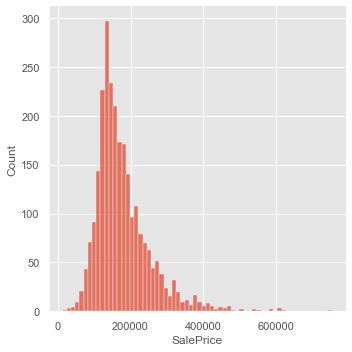

In [148]:
# Back to understanding dependent variable
plt.style.use("ggplot")
sns.displot(housing['SalePrice'])

In [149]:
# Check distribution normality

n = len(housing)
SES = np.sqrt(6 / n) # Standard error of skewness

# Check skewness and kurtosis/tailness
print("Skewness: %f" % housing['SalePrice'].skew())
print("Kurtosis: %f" % housing['SalePrice'].kurt())
print(f"SES: {SES}")


Skewness: 1.760751
Kurtosis: 5.430411
SES: 0.048233630725846105


Interpretation: SES of 0.5 vs skewness of 1.76 means that skewness is not due to chance and 1.76 is usually considered
highly skewed to the right or positive - long right tale. A kurtosis of 5.4 is significantly higher than the kurtosis of a normal distribution which is 3. This means the distribution has fatter tails and a sharper peak than a normal distribution.

Skewness: 0.041724
Kurtosis: 1.397774


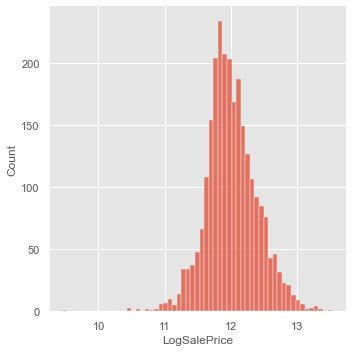

In [150]:
# Check the log of the sale price to get a more normal distribution
housing['LogSalePrice'] = np.log(housing['SalePrice'])

sns.displot(housing['LogSalePrice'])

# Check skewness and kurtosis/tailness
print("Skewness: %f" % housing['LogSalePrice'].skew())
print("Kurtosis: %f" % housing['LogSalePrice'].kurt())

In [151]:
# Check out correlation of numeric variables to dependent variable
num_corr = housing.corr()['SalePrice'].sort_values(ascending=False)
print(num_corr[num_corr > 0.5])

SalePrice       1.000000
LogSalePrice    0.950057
OverallQual     0.790661
GrLivArea       0.719980
TotalBsmtSF     0.652268
1stFlrSF        0.642623
GarageCars      0.639017
GarageArea      0.635029
YearBuilt       0.544569
FullBath        0.535175
GarageYrBlt     0.521105
YearRemodAdd    0.514720
MasVnrArea      0.501047
Name: SalePrice, dtype: float64


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

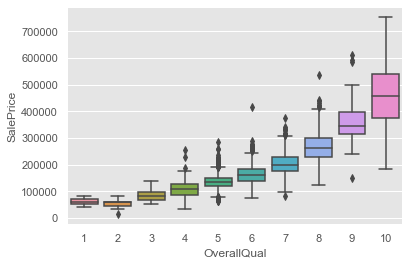

In [152]:
# Plot boxplot of OverallQual (int on scale of 1-10) vs SalePrice
plt.style.use("ggplot")
sns.boxplot(x='OverallQual', y='SalePrice', data=housing)

Interpretation: non-linear relationship between overall home quality and sale price, particularly at higher quality levels. 

In [153]:
# Check degree of multicollinearity of gross living area vs garage size and 1st floor size to see if I need to separate.

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

features = housing[['GrLivArea', 'TotalBsmtSF', '1stFlrSF']]
features = features.dropna()

#Calc corr matrix for features in question
print(features.corr())

# Check VIF by adding a constant and creating VIF DF
X = add_constant(features)

vif_data = pd.DataFrame()
vif_data["features"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

             GrLivArea  TotalBsmtSF  1stFlrSF
GrLivArea     1.000000     0.409900  0.539056
TotalBsmtSF   0.409900     1.000000  0.784643
1stFlrSF      0.539056     0.784643  1.000000
      features        VIF
0        const  13.071386
1    GrLivArea   1.410489
2  TotalBsmtSF   2.603528
3     1stFlrSF   3.053331


Interpretation: while basement size and first floor size are highly correlated neither variable has a high VIF. Usually a VIF over 5 or sometimes over 10 is considered to have multicollinearity that needs to be dealt with. This suggests that even though the two variables are similar directionally they still have unique information that could help predict house price. 

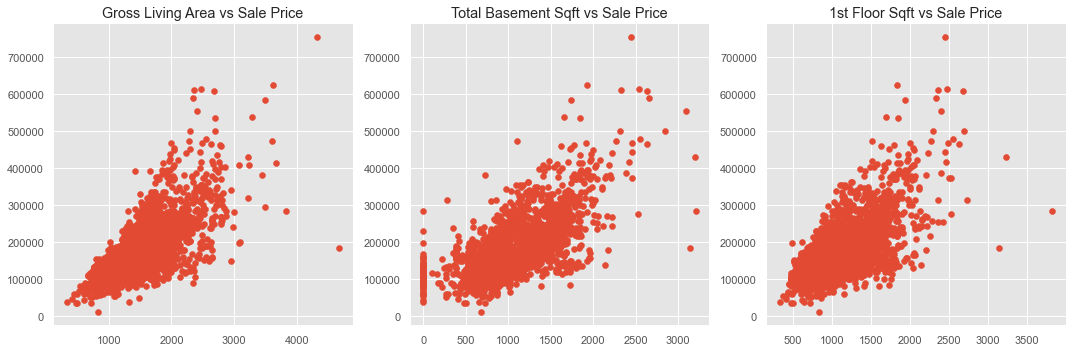

In [154]:
# Now check important area features vs sale price

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(housing['GrLivArea'], housing['SalePrice'])
plt.title("Gross Living Area vs Sale Price")

plt.subplot(1,3,2)
plt.scatter(housing['TotalBsmtSF'], housing['SalePrice'])
plt.title("Total Basement Sqft vs Sale Price")

plt.subplot(1,3,3)
plt.scatter(housing['1stFlrSF'], housing['SalePrice'])
plt.title("1st Floor Sqft vs Sale Price")

plt.tight_layout()
plt.show()

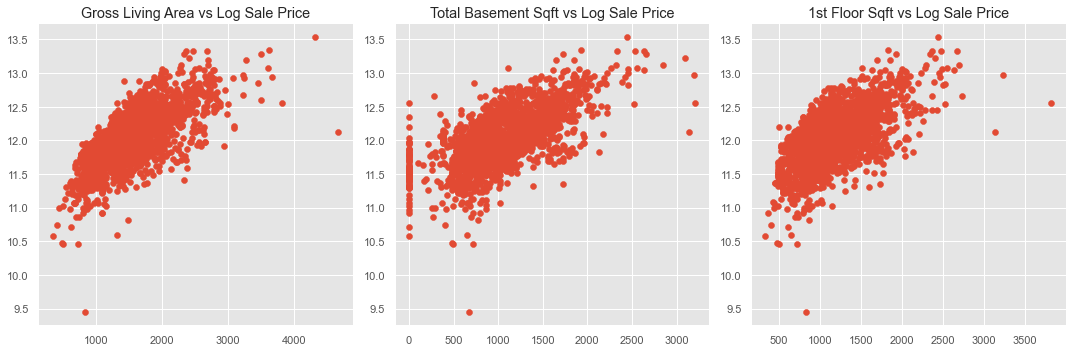

In [155]:
# Recheck against the log of house price
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(housing['GrLivArea'], housing['LogSalePrice'])
plt.title("Gross Living Area vs Log Sale Price")

plt.subplot(1,3,2)
plt.scatter(housing['TotalBsmtSF'], housing['LogSalePrice'])
plt.title("Total Basement Sqft vs Log Sale Price")

plt.subplot(1,3,3)
plt.scatter(housing['1stFlrSF'], housing['LogSalePrice'])
plt.title("1st Floor Sqft vs Log Sale Price")

plt.tight_layout()
plt.show()

Interpretation: the log of the house sale price creates a more normal distribution which is better for linear models (assumed by linear models). Looking at some of the features that correlate highly with house price, using the log also helps limit heteroscedasticity - makes the spread of residuals more even across the x-axis values, which is also an assumption in linear models. 

<AxesSubplot:>

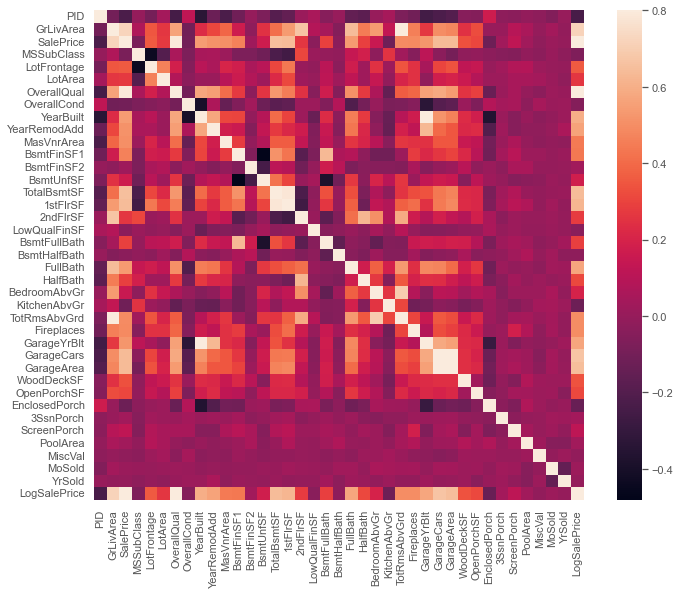

In [156]:
# Now let's look at some correlation matrices
housing_corrs = housing.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(housing_corrs, vmax = .8, square=True)

In [157]:
housing = housing.reset_index(drop=True)

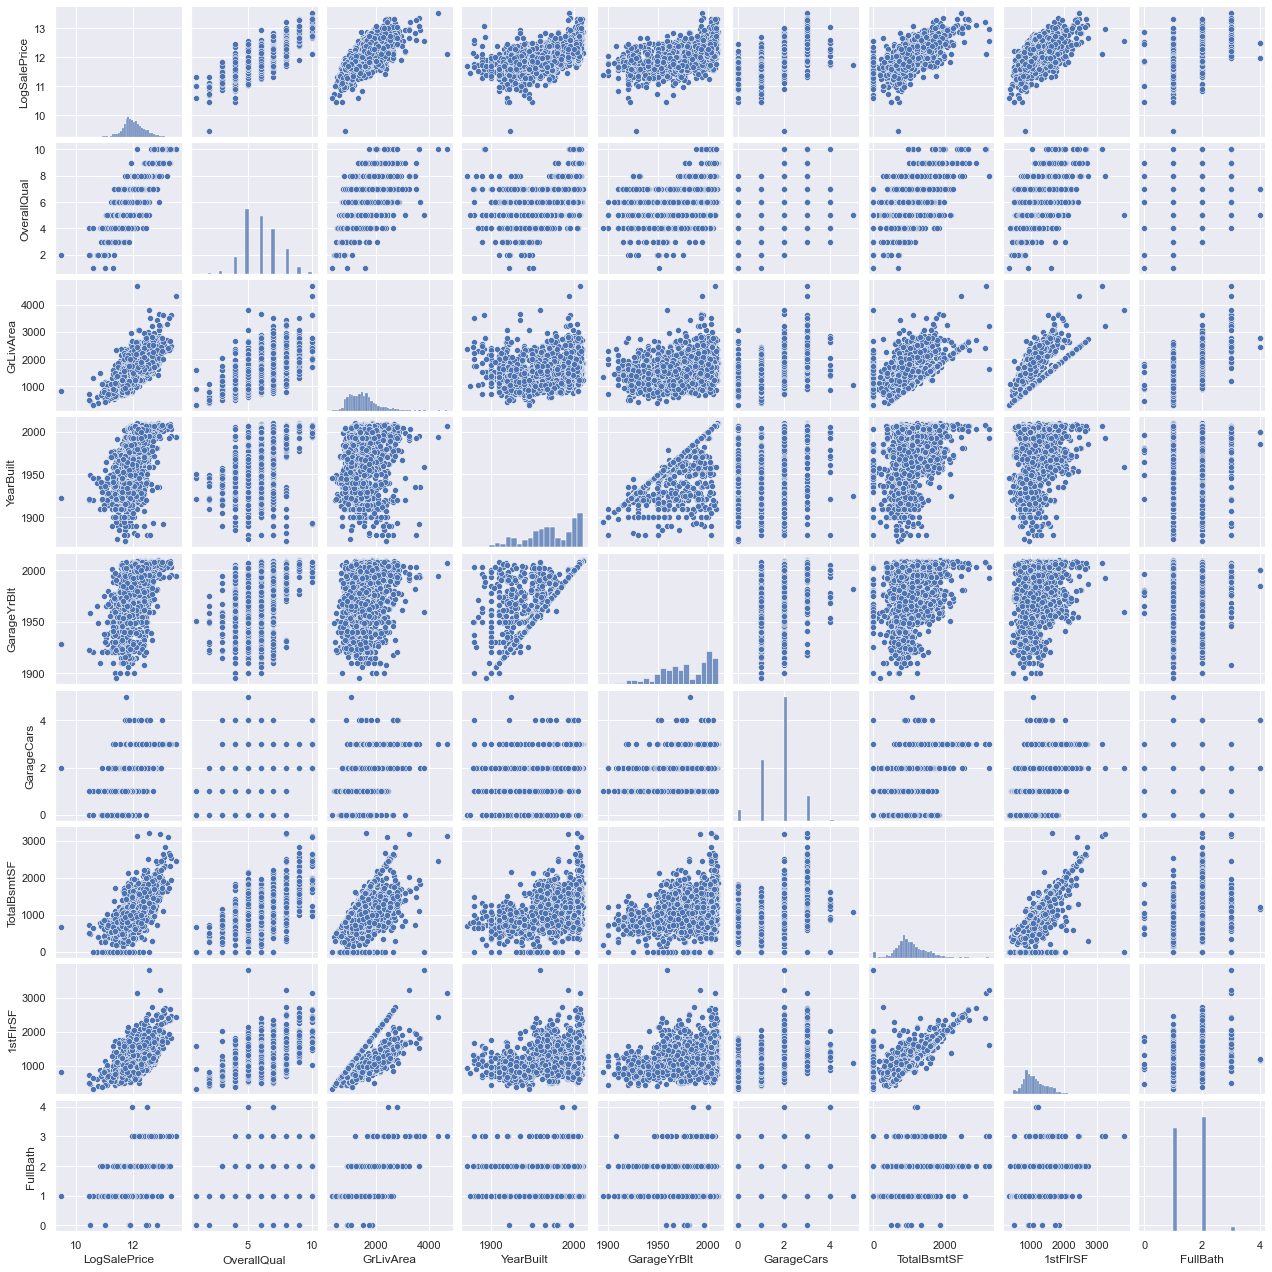

In [158]:
# Do a pairplot of the most correlated features to see their relationship with log of sale price
sns.set()
cols = ['LogSalePrice', 'OverallQual', 'GrLivArea', 'YearBuilt', 'GarageYrBlt', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath']
sns.pairplot(housing[cols], height=2)
plt.show()

Interpretation: Some oddities here. Sometimes basement sqft is larger than the gross living area, which may not be impossible but is certainly odd. Outliers to remove? Perhaps the same outlier with a giant basement also showing larger than 1st floor sqft? 

Most features look to have descent heteroscedasticity vs log sale price, which is good for linear modeling. 

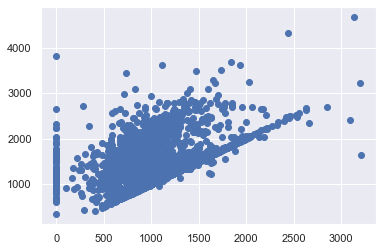

In [159]:
plt.scatter(housing['TotalBsmtSF'],housing['GrLivArea'])

Shifting gears here. Since my goal is describe-ability (how different features, or groups of features, affect house sale price), I don't want to bother with linear models if the dataset has high multicollinearity. If that is the case, then my preprocessing will change - I won't need one-hot encoding and I'll tend to use label encoding for ordinal categorical data. I also won't need to remove features as often. So I'm going to test VIF on the numerical features to gauge multicollinearity. 

In [160]:
# Analyze multicollinearity in the numerical features with VIF

numerical_data = housing.select_dtypes(include=['float64', 'int64'])

# Drop identifier values
numerical_data.drop(['PID'], axis=1)

# Drop NAs since I'll deal with imputing them later
numerical_data = numerical_data.dropna()

# Add constant
X = add_constant(numerical_data)

# Calc VIF
vif_df = pd.DataFrame()
vif_df["Feature"] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_df

c:\Users\willf\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
0,const,2.450023e+06
1,PID,1.250161e+00
2,GrLivArea,inf
3,SalePrice,1.485845e+01
4,MSSubClass,1.800866e+00
5,LotFrontage,1.892507e+00
6,LotArea,1.433337e+00
7,OverallQual,4.016929e+00
8,OverallCond,1.973439e+00
9,YearBuilt,6.195463e+00


Because we see infinite multicollinearity in certain features it does not make sense to try to use linear models for the full feature set. I will preprocess for tree based models, label encoding ordinal categorical data when possible. 

------------------------------------------------- Missing Data ----------------------------------------------------

C:\Users\willf\AppData\Local\Temp\ipykernel_5928\110644024.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(missing_data.index, rotation=90, ha='right')


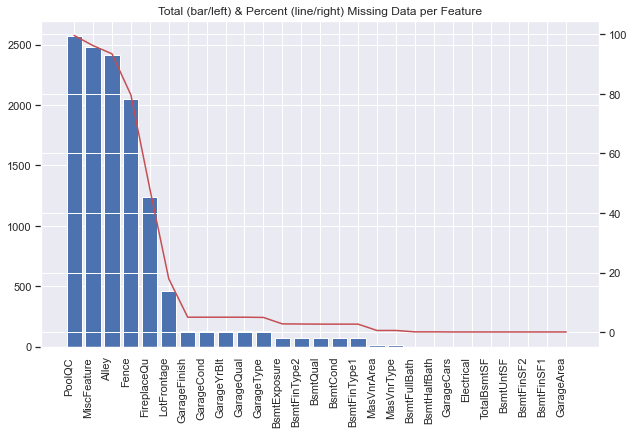

In [161]:
# Now get into missing data - calc total and % missing rows per col
total = housing.isnull().sum().sort_values(ascending=False)
percent = (housing.isnull().sum() / housing.shape[0] * 100)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data[missing_data['Total'] > 0]

f, ax1 = plt.subplots(figsize=(10,6))

ax1.bar(missing_data.index, missing_data['Total'], color='b')

ax2 = ax1.twinx()
ax2.plot(missing_data.index, missing_data['Percent'], color='r')

ax1.set_xticklabels(missing_data.index, rotation=90, ha='right')
plt.title("Total (bar/left) & Percent (line/right) Missing Data per Feature")
plt.show()

For categorical variables like pool quality and misc feature that have NAs to mean no pool or no misc features, I will either replace the NAs with 'None' when the variables are not ordinal, or replace NAs with zero as part of label encoding ordinal categorical variables. I want to label encode to reduce dimensionality (avoid one-hot encoding when possible). Most tree based models accept categorical variables but some don't so label encoding can help set up the data for testing with multiple models.

It may be helpful to have these later for descriptive purposes so I won't drop them yet, even if they have a very low corrleation with sale price. These include, Alley, Fence, FireplaceQu, the Bsmnt & Garage categorical features...

Other numerical null values are puzzling. LotFrontage for example is about 18% NAs meaning there are no streets connected to the property. This is highly unlikely in 2010, so I should look into these houses to see if they have other odd characteristics.

May be interesting to cross reference rows with no basement with rows with NA numerical basement values like BsmtFullBath. There are fewer numerical basement features with NAs which suggests sometimes they put zero when there was no basement or that they recorded no basement incorrectly. Generally suggests some poor surveying/data acquisition.



In [22]:
housing['ExterQual'].isna().sum()

0

In [23]:
# Deal with missing categorical variable NA rows that mean none (no garage, etc.) that should not be label encoded

# Change NA to 'None'
cat_cols = ['MiscFeature', 'Alley', 'Fence', 'GarageType',
             'MasVnrType', 'Electrical']

for col in cat_cols:
    housing[col] = housing[col].fillna('None')

#Check
print(housing[cat_cols].isnull().sum())

MiscFeature    0
Alley          0
Fence          0
GarageType     0
MasVnrType     0
Electrical     0
dtype: int64


In [24]:
# Label encode categorical variables with ordinal structure and missing data - replace NA with zero

label_encode_vars_withnull = ['PoolQC',  'GarageFinish', 'GarageCond', 'GarageQual','FireplaceQu',
                     'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',]

# First replace all null values with zero
housing[label_encode_vars_withnull] = housing[label_encode_vars_withnull].fillna(0)

# Next create dict for 5-scale quality features, list quality features, and replace
Qualities = {'Po': 1,'Fa': 2,'TA': 3,'Gd': 4,'Ex': 5}

label_encode_quality_vars = ['PoolQC','FireplaceQu','GarageQual','GarageCond','BsmtQual', 'BsmtCond','KitchenQual', 
                             'ExterQual', 'ExterCond', 'HeatingQC']

for col in label_encode_quality_vars:
    housing[col] = housing[col].replace(Qualities)

In [25]:
# Lotshape
lotshape_dict = {'IR3':0, 'IR2':1, 'IR1':2, 'Reg':3}
housing['LotShape'] = housing['LotShape'].replace(lotshape_dict)

housing['LotShape'].describe()

count    2579.000000
mean        2.598294
std         0.570762
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: LotShape, dtype: float64

In [26]:
# Now label encode other variables that don't follow Qualities scale

# Lotshape
lotshape_dict = {'IR3':0, 'IR2':1, 'IR1':2, 'Reg':3}
housing['LotShape'] = housing['LotShape'].replace(lotshape_dict)

# GarageFinish
garagefinish_dict = {'Unf':1, 'RFn':2, 'Fin':3}
housing['GarageFinish'] = housing['GarageFinish'].replace(garagefinish_dict)

# BsmtExposure
bsmtexposure_dict = {'No':1, 'Mn':2, 'Av':3, 'Gd':4}
housing['BsmtExposure'] = housing['BsmtExposure'].replace(bsmtexposure_dict)

# BsmtFinTypes 1 & 2
bsmtfintype_dict = {'Unf':1, 'LwQ':1, 'Rec':2, 'BLQ':3, 'ALQ': 4, 'GLQ':5}

housing['BsmtFinType1'] = housing['BsmtFinType1'].replace(bsmtfintype_dict)
housing['BsmtFinType2'] = housing['BsmtFinType2'].replace(bsmtfintype_dict)

# Functional
functional_dict = {'Sal':0,'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7}
housing['Functional'] = housing['Functional'].replace(functional_dict)



In [27]:
# Binary encode categorical features with only 2 categories

# Street
street_dict = {'Grvl':0, 'Pave':1}
housing['Street'] = housing['Street'].replace(street_dict)

# CentralAir
centralair_dict = {'N':0, 'Y':1}
housing['CentralAir'] = housing['CentralAir'].replace(centralair_dict)

In [28]:
# Remove utilities b/c it has no variance (after fixing missing vals)
housing.drop(['Utilities'], axis=1, inplace=True)

In [29]:
# Check remaining non-numeric columns
non_numeric_cols = housing.select_dtypes(exclude=[np.number])
non_numeric_cols.nunique().sort_values()

Alley             3
LandSlope         3
PavedDrive        3
LandContour       4
MasVnrType        4
LotConfig         5
MiscFeature       5
Fence             5
BldgType          5
Electrical        5
SaleCondition     6
RoofStyle         6
Heating           6
Foundation        6
GarageType        7
MSZoning          7
RoofMatl          7
HouseStyle        8
Condition2        8
Condition1        9
SaleType         10
Exterior1st      15
Exterior2nd      16
Neighborhood     28
dtype: int64

For now, I will keep these as categorical variables and see what happens when I run a tree based model that accepts categorical variables. Perhaps none of them will end up having significant influence or perhaps I will decide to label encode since tree based models can handle that. 

In [30]:
# Check missing lot frontage values to see if they are random
lf_nulls = housing[housing['LotFrontage'].isna()]

# What other cols have null values? 
lf_nulls_colnulls = lf_nulls.isna().sum()
lf_nulls_colnulls = lf_nulls_colnulls[lf_nulls_colnulls>0]
print(lf_nulls_colnulls)

# Are null LFs in simlar neighborhoods?
housing_hood_counts = housing.groupby('Neighborhood').size()
lf_nulls_hoods = lf_nulls.groupby('Neighborhood').size()

hood_share_nullLF = (lf_nulls_hoods / housing_hood_counts) * 100

print(hood_share_nullLF)
print(housing_hood_counts)

LotFrontage    462
MasVnrArea       5
GarageYrBlt      9
dtype: int64
Neighborhood
Blmngtn     34.782609
Blueste           NaN
BrDale            NaN
BrkSide     10.679612
ClearCr     57.500000
CollgCr     19.491525
Crawfor     20.652174
Edwards      8.484848
Gilbert     36.363636
Greens      12.500000
GrnHill    100.000000
IDOTRR       7.894737
Landmrk    100.000000
MeadowV     11.764706
Mitchel     23.076923
NAmes       15.365854
NPkVill      9.090909
NWAmes      35.772358
NoRidge     23.880597
NridgHt      1.652893
OldTown      4.694836
SWISU        7.142857
Sawyer      35.251799
SawyerW     16.814159
Somerst     13.286713
StoneBr      9.302326
Timber      22.222222
Veenker     34.782609
dtype: float64
Neighborhood
Blmngtn     23
Blueste     10
BrDale      29
BrkSide    103
ClearCr     40
CollgCr    236
Crawfor     92
Edwards    165
Gilbert    143
Greens       8
GrnHill      2
IDOTRR      76
Landmrk      1
MeadowV     34
Mitchel    104
NAmes      410
NPkVill     22
NWAmes     123
NoR

We can impute LotFrontage based on neighborhood averages or based on lotshape/size or 1stfloor size. 

-------------------- Merge Real Estate DF and Latitude and Longitude Data from R -----------------------------------

In [31]:
duplicate_rows = housing[housing.duplicated(keep=False)]
print(duplicate_rows)
print(housing.shape)

Empty DataFrame
Columns: [PID, GrLivArea, SalePrice, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, LogSalePrice]
Index: []

[0 rows x 81 columns]
(

In [32]:
# Get addresses and see if missing LF are clustered together
ames_re = pd.read_csv(r"C:\Users\willf\OneDrive\Documents\NYDSA\Machine Learning Project\Ames Real Estate Data.csv", index_col=0)

ames_re = ames_re.drop_duplicates(keep='first')

ames_re_columns_to_merge = ['GeoRefNo', 'Prop_Addr', 'ClassPr_S', 'ClassSc_S', 'AcreGr', 'AcreNt_S','NmbrBRs']

ames_re_subset = ames_re[ames_re_columns_to_merge]

# Drop full row dupes from ames
ames_re_subset = ames_re_subset.drop_duplicates(keep='first')

ames_dupes = ames_re_subset[ames_re_subset.duplicated(keep=False)]
print(ames_dupes)

# Drop GeoRefNo dupes from ames
duplicate_mask = ames_re_subset['GeoRefNo'].duplicated(keep=False)
ames_re_subset = ames_re_subset[~duplicate_mask]


is_pid_unique = housing['PID'].is_unique
print(f"PID in housing is unique: {is_pid_unique}")

is_georefno_unique = ames_re_subset['GeoRefNo'].is_unique
print(f"GeoRefNo in ames_re_subset is unique: {is_georefno_unique}")

housing_re = housing.merge(ames_re_subset, how = 'left', left_on='PID', right_on='GeoRefNo')

housing_re.drop(columns=['GeoRefNo'], inplace=True)

housing_re.shape


Empty DataFrame
Columns: [GeoRefNo, Prop_Addr, ClassPr_S, ClassSc_S, AcreGr, AcreNt_S, NmbrBRs]
Index: []
PID in housing is unique: True
GeoRefNo in ames_re_subset is unique: True


C:\Users\willf\AppData\Local\Temp\ipykernel_5928\1147301073.py:2: DtypeWarning: Columns (36,40,81,87) have mixed types. Specify dtype option on import or set low_memory=False.
  ames_re = pd.read_csv(r"C:\Users\willf\OneDrive\Documents\NYDSA\Machine Learning Project\Ames Real Estate Data.csv", index_col=0)


(2579, 87)

In [33]:
# Double check for dupes

duplicate_rows = housing_re[housing_re.duplicated(keep=False)]
print(duplicate_rows)

Empty DataFrame
Columns: [PID, GrLivArea, SalePrice, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, LogSalePrice, Prop_Addr, ClassPr_S, ClassSc_S, A

In [34]:
# Clean up extra cols in housing_re
print(housing_re.columns.sort_values())
print(housing_re.shape)

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'AcreGr', 'AcreNt_S', 'Alley',
       'BedroomAbvGr', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath',
       'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'ClassPr_S',
       'ClassSc_S', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence',
       'FireplaceQu', 'Fireplaces', 'Foundation', 'FullBath', 'Functional',
       'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual',
       'GarageType', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating',
       'HeatingQC', 'HouseStyle', 'KitchenAbvGr', 'KitchenQual', 'LandContour',
       'LandSlope', 'LogSalePrice', 'LotArea', 'LotConfig', 'LotFrontage',
       'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrArea',
       'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold', 'Neighborhood',
       'NmbrBRs', 'Open

In [35]:
ames_latlon = pd.read_csv(r"C:/Users/willf/OneDrive/Documents/NYDSA/R/Olist/ames_latlon.csv")

print(ames_latlon.columns.sort_values())
print(housing_re.columns.sort_values())

# housing_re.to_csv("housing_re.csv")

Index(['Alley', 'Bedroom_AbvGr', 'Bldg_Type', 'BsmtFin_SF_1', 'BsmtFin_SF_2',
       'BsmtFin_Type_1', 'BsmtFin_Type_2', 'Bsmt_Cond', 'Bsmt_Exposure',
       'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Bsmt_Unf_SF', 'Central_Air',
       'Condition_1', 'Condition_2', 'Electrical', 'Enclosed_Porch',
       'Exter_Cond', 'Exterior_1st', 'Exterior_2nd', 'Fence', 'Fireplaces',
       'First_Flr_SF', 'Foundation', 'Full_Bath', 'Functional', 'Garage_Area',
       'Garage_Cars', 'Garage_Cond', 'Garage_Finish', 'Garage_Type',
       'Gr_Liv_Area', 'Half_Bath', 'Heating', 'Heating_QC', 'House_Style',
       'Kitchen_AbvGr', 'Land_Contour', 'Land_Slope', 'Latitude', 'Longitude',
       'Lot_Area', 'Lot_Config', 'Lot_Frontage', 'Lot_Shape', 'MS_SubClass',
       'MS_Zoning', 'Mas_Vnr_Area', 'Mas_Vnr_Type', 'Misc_Feature', 'Misc_Val',
       'Mo_Sold', 'Neighborhood', 'Open_Porch_SF', 'Overall_Cond',
       'Paved_Drive', 'Pool_Area', 'Pool_QC', 'Roof_Matl', 'Roof_Style',
       'Sale_Condition', 'Sale_P

In [36]:
# ames_latlon.rename(columns={'LotArea_y':'LotArea'}, inplace=True)
ames_latlon.rename(columns={'YrBuilt':'YearBuilt'}, inplace=True)

print(ames_latlon.columns.sort_values())


Index(['Alley', 'Bedroom_AbvGr', 'Bldg_Type', 'BsmtFin_SF_1', 'BsmtFin_SF_2',
       'BsmtFin_Type_1', 'BsmtFin_Type_2', 'Bsmt_Cond', 'Bsmt_Exposure',
       'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Bsmt_Unf_SF', 'Central_Air',
       'Condition_1', 'Condition_2', 'Electrical', 'Enclosed_Porch',
       'Exter_Cond', 'Exterior_1st', 'Exterior_2nd', 'Fence', 'Fireplaces',
       'First_Flr_SF', 'Foundation', 'Full_Bath', 'Functional', 'Garage_Area',
       'Garage_Cars', 'Garage_Cond', 'Garage_Finish', 'Garage_Type',
       'Gr_Liv_Area', 'Half_Bath', 'Heating', 'Heating_QC', 'House_Style',
       'Kitchen_AbvGr', 'Land_Contour', 'Land_Slope', 'Latitude', 'Longitude',
       'Lot_Area', 'Lot_Config', 'Lot_Frontage', 'Lot_Shape', 'MS_SubClass',
       'MS_Zoning', 'Mas_Vnr_Area', 'Mas_Vnr_Type', 'Misc_Feature', 'Misc_Val',
       'Mo_Sold', 'Neighborhood', 'Open_Porch_SF', 'Overall_Cond',
       'Paved_Drive', 'Pool_Area', 'Pool_QC', 'Roof_Matl', 'Roof_Style',
       'Sale_Condition', 'Sale_P

In [38]:
from fuzzywuzzy import fuzz

ames_latlon.rename(columns={'Sale_Price':'SalePrice','Lot_Area': 'LotArea', 'Year_Remod_Add':'YearRemodAdd', 'Gr_Liv_Area':'GrLivArea', 'Mo_Sold':'MoSold', 'Year_Sold': 'YrSold'}, inplace=True)
columns_to_check = ['SalePrice','LotArea', 'YearRemodAdd', 'GrLivArea', 'MoSold', 'YrSold']
print(ames_latlon[columns_to_check])

for col in columns_to_check:
    if not ames_latlon[col].apply(lambda x: str(x).isdigit()).all():
        print(f"Column '{col}' contains non-numeric values.")
    else:
        ames_latlon[col] = ames_latlon[col].astype(housing_re[col].dtype)



      SalePrice  LotArea  YearRemodAdd  GrLivArea  MoSold  YrSold
0        215000    31770          1960       1656       5    2010
1        105000    11622          1961        896       6    2010
2        172000    14267          1958       1329       6    2010
3        244000    11160          1968       2110       4    2010
4        189900    13830          1998       1629       3    2010
...         ...      ...           ...        ...     ...     ...
2925     142500     7937          1984       1003       3    2006
2926     131000     8885          1983        902       6    2006
2927     132000    10441          1992        970       7    2006
2928     170000    10010          1975       1389       4    2006
2929     188000     9627          1994       2000      11    2006

[2930 rows x 6 columns]


In [39]:

# Check uniqueness in housing_re
if not housing_re[columns_to_check].duplicated(keep=False).sum() == 0:
    print("Non-unique combinations in housing_re based on columns_to_check")



# Correct creation of ames_latlon_merge_full
ames_latlon_merge_full = ames_latlon[['Latitude', 'Longitude'] + columns_to_check]

# Drop duplicates from ames_latlon_merge_full
ames_latlon_merge_full = ames_latlon_merge_full.drop_duplicates(subset=columns_to_check)

# Check for non-unique combinations in ames_latlon
if not ames_latlon_merge_full[columns_to_check].duplicated(keep=False).sum() == 0:
    print("There are non-unique combinations in ames_latlon_merge_full based on columns_to_check")

print(ames_latlon_merge_full.shape)

# Perform the merge with housing_re
housing_re_latlon = pd.merge(housing_re, 
                             ames_latlon_merge_full, 
                             left_on=columns_to_check,
                             right_on=columns_to_check, 
                             how='left')

# Check for rows that are matched multiple times
multi_matched_rows = housing_re_latlon[housing_re_latlon.duplicated(subset=columns_to_check, keep=False)]

print(multi_matched_rows)


(2928, 8)
Empty DataFrame
Columns: [PID, GrLivArea, SalePrice, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, LogSalePrice, Prop_Addr, ClassPr_S, Cl

In [40]:
housing_re_latlon = pd.merge(
    housing_re, 
    ames_latlon_merge_full, 
    left_on=columns_to_check, 
    right_on=columns_to_check, 
    how='left')


In [41]:
duplicate_rows_full = housing_re_latlon[housing_re_latlon.duplicated(keep=False)]

print(duplicate_rows_full['PID'])
print(housing_re_latlon.shape)
print(housing_re.shape)

Series([], Name: PID, dtype: int64)
(2579, 89)
(2579, 87)


In [42]:
# Now save full DF with lat and lon
housing_re_latlon.to_csv("housing_re_latlon.csv")

------------------------------ Imputation ---------------------------------------------------

In [43]:
print(housing_re_latlon.columns)

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDriv

 For the time being I'm going to impute Lot Frontage based on Neighborhood medians and Garage Yr Built on Yr Built

In [44]:
# Impute Lot Frontage values by neighborhood (or median for total DF) - make new variable

# Get median values
median_LF_neighborhood = housing_re_latlon.groupby('Neighborhood')['LotFrontage'].median()
median_LF_overall = housing_re_latlon['LotFrontage'].median()

# Impute first with median by neighborhood and then left overs by median for DF as a whole
housing_re_latlon['LF_median'] = housing_re_latlon['LotFrontage'].fillna(median_LF_neighborhood)
housing_re_latlon['LF_median'] = housing_re_latlon['LotFrontage'].fillna(median_LF_overall)

# Check
print(housing_re_latlon['LF_median'].isna().sum())

0


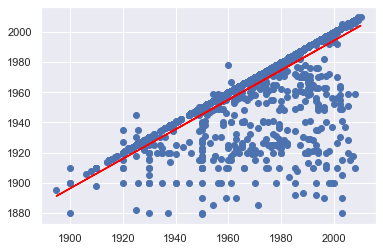

In [45]:
# Impute house YearBuilt for missing GarageYrBuilt - Check relationship

valid_data = housing_re_latlon[housing_re['GarageYrBlt'].notna()]

slope, intercept, r_value, p_value, std_err = stats.linregress(valid_data['GarageYrBlt'], valid_data['YearBuilt'])


plt.scatter(valid_data['GarageYrBlt'], valid_data['YearBuilt'])


plt.plot(valid_data['GarageYrBlt'], slope*valid_data['GarageYrBlt'] + intercept, color='red')

plt.show()

In [46]:
# Impute GarageYrBlt with YearBuilt

housing_re_latlon['GarageYrBlt'].fillna(housing_re_latlon['YearBuilt'], inplace=True)

# Check
print(housing_re_latlon['GarageYrBlt'].isna().sum())

0


----------------------------------------------- Missing Data 2 --------------------------------------------------------

C:\Users\willf\AppData\Local\Temp\ipykernel_5928\3061907398.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(missing_data.index, rotation=90, ha='right')


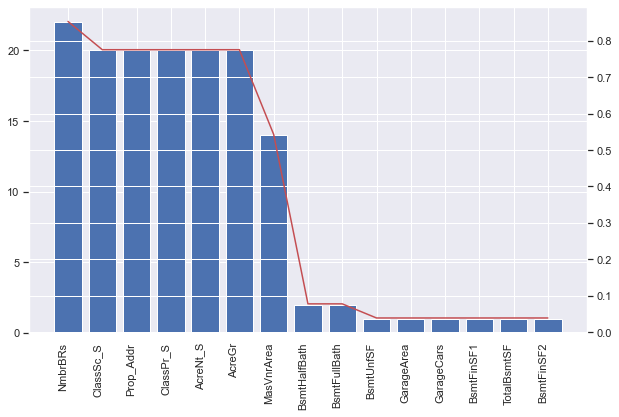

In [47]:
# Now recheck what's still missing

# Create new DF with no LotFrontage, just LF_median
ames_geo = housing_re_latlon.drop('LotFrontage', axis=1)

total = ames_geo.isnull().sum().sort_values(ascending=False)
percent = (ames_geo.isnull().sum() / ames_geo.shape[0] * 100)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data[missing_data['Total'] > 0]

f, ax1 = plt.subplots(figsize=(10,6))

ax1.bar(missing_data.index, missing_data['Total'], color='b')

ax2 = ax1.twinx()
ax2.plot(missing_data.index, missing_data['Percent'], color='r')

ax1.set_xticklabels(missing_data.index, rotation=90, ha='right')

plt.show()

In [48]:
# ClassSc_S is house type (split level, etc.) - no good way to impute so need to cut
# Checking if other columns with same number of NA's are also same rows
class_na = ames_geo[ames_geo['ClassSc_S'].isna()]

class_na[['NmbrBRs', 'AcreNt_S', 'AcreGr', 'ClassPr_S', 'Prop_Addr']]

# Drop where ClassSc_S is na
ames_geo = ames_geo.dropna(subset=['ClassSc_S'])

# Check
ames_geo['ClassSc_S'].isna().sum()

0

Cutting two rows with missing Number of BRs because one is a vacant lot and the other is a triplex (3 townhouses?) that says it has only 600 sq ft of gross living area which is clearly untrue, even if it were per townhouse (each is 2 stories)

In [49]:
# Drop remaining NmbrBRs

ames_geo = ames_geo.dropna(subset=['NmbrBRs'])

# Check
ames_geo['NmbrBRs'].isna().sum()

0

In [50]:
# Check MsnVnrArea and MsnVnrType

mas_nas = ames_geo[ames_geo['MasVnrArea'].isna()]

mas_nas[['MasVnrArea','MasVnrType']]

# Since all types are none, change areas to zero
ames_geo['MasVnrArea'].fillna(0, inplace=True)

# Check
ames_geo['MasVnrArea'].isna().sum()

0

In [51]:
garage_cols = [col for col in ames_geo.columns if col.startswith('Garage')]
print(ames_geo[ames_geo[garage_cols].isna().any(axis=1)][garage_cols])

    GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  \
433     Detchd       1923.0             0         NaN         NaN           0   

     GarageCond  
433           0  


In [52]:
ames_geo.loc[433,['GarageType', 'GarageYrBlt', 'GarageCars', 'GarageArea']] = 'None'

# Check
garage_cols = [col for col in ames_geo.columns if col.startswith('Garage')]
print(ames_geo[ames_geo[garage_cols].isna().any(axis=1)][garage_cols])

Empty DataFrame
Columns: [GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond]
Index: []


In [53]:
cols_to_fill = ['BsmtHalfBath', 'BsmtFullBath', 'TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']

ames_geo[cols_to_fill] = ames_geo[cols_to_fill].fillna(0)

#Check
ames_geo[cols_to_fill].isna().sum()

BsmtHalfBath    0
BsmtFullBath    0
TotalBsmtSF     0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
dtype: int64

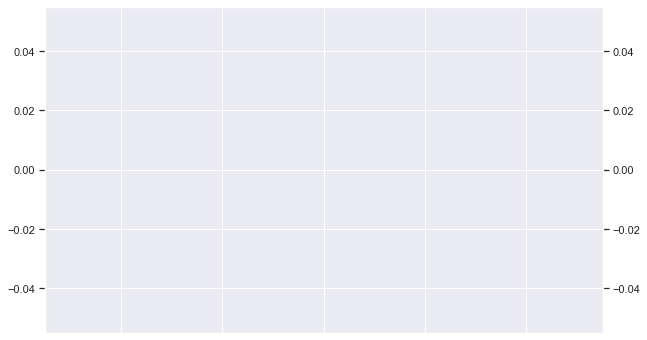

In [54]:
# Check remaining NAs
total = ames_geo.isnull().sum().sort_values(ascending=False)
percent = (ames_geo.isnull().sum() / ames_geo.shape[0] * 100)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data[missing_data['Total'] > 0]

f, ax1 = plt.subplots(figsize=(10,6))

ax1.bar(missing_data.index, missing_data['Total'], color='b')

ax2 = ax1.twinx()
ax2.plot(missing_data.index, missing_data['Percent'], color='r')

ax1.set_xticklabels(missing_data.index, rotation=90, ha='right')

plt.show()

In [55]:
ames_geo.to_csv("ames_geo_nonulls.csv")

---------------------------- Feature Formatting, Correlation, Cuts --------------------------------------------------------------------

In [56]:
# Return MSSubClass to proper categorical variables
mssub_dict = {20:'1-STORY 1946 & NEWER ALL STYLES', 30:'1-STORY 1945 & OLDER', 40: '1-STORY W/FINISHED ATTIC ALL AGES',
45: '1-1/2 STORY - UNFINISHED ALL AGES', 50:'1-1/2 STORY FINISHED ALL AGES', 60:'2-STORY 1946 & NEWER', 70: '2-STORY 1945 & OLDER',
75:'2-1/2 STORY ALL AGES', 80: 'SPLIT OR MULTI-LEVEL', 85: 'SPLIT FOYER', 90:'DUPLEX - ALL STYLES AND AGES', 
120: '1-STORY PUD 1946 & NEWER', 150:'1-1/2 STORY PUD - ALL AGES', 160:'2-STORY PUD - 1946 & NEWER', 
180: 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', 190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'}

ames_geo['MSSubClass'] = ames_geo['MSSubClass'].replace(mssub_dict)

ames_geo['MSSubClass']

0                  1-STORY 1945 & OLDER
1              1-STORY PUD 1946 & NEWER
2                  1-STORY 1945 & OLDER
3                  2-STORY 1945 & OLDER
4                  2-STORY 1946 & NEWER
                     ...               
2574               1-STORY 1945 & OLDER
2575    1-STORY 1946 & NEWER ALL STYLES
2576       DUPLEX - ALL STYLES AND AGES
2577               2-STORY 1946 & NEWER
2578               2-STORY 1946 & NEWER
Name: MSSubClass, Length: 2557, dtype: object

In [57]:
# Change Garage Area to Numeric
ames_geo['GarageArea'] = ames_geo['GarageArea'].replace('None', 0)
ames_geo['GarageArea'] = pd.to_numeric(ames_geo['GarageArea'], errors='raise')

In [58]:
# Label encode PavedDrive
paveddr_dict = {'N':0 ,'P':1, 'Y':2}

ames_geo['PavedDrive'] = ames_geo['PavedDrive'].replace(paveddr_dict)

ames_geo['PavedDrive']

0       2
1       2
2       0
3       0
4       2
       ..
2574    1
2575    2
2576    2
2577    2
2578    2
Name: PavedDrive, Length: 2557, dtype: int64

In [59]:
# Create Month-Year categorical variable
ames_geo['YmSold'] = ames_geo['YrSold'].astype(str) + '-' + ames_geo['MoSold'].astype(str)
ames_geo['YmSold']

0        2010-3
1        2009-2
2       2007-11
3        2009-5
4       2009-11
         ...   
2574     2009-5
2575     2009-6
2576     2007-8
2577     2007-7
2578     2006-9
Name: YmSold, Length: 2557, dtype: object

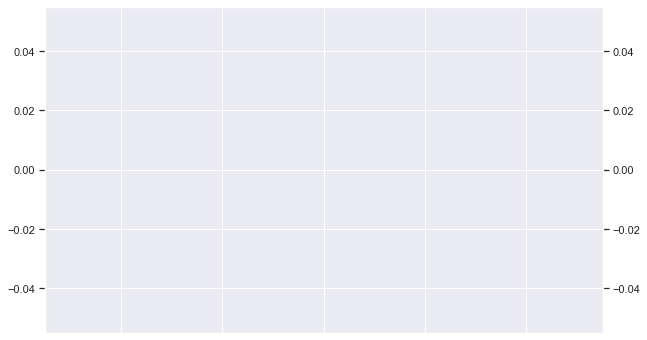

In [60]:
# Check remaining NAs
total = ames_geo.isnull().sum().sort_values(ascending=False)
percent = (ames_geo.isnull().sum() / ames_geo.shape[0] * 100)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data[missing_data['Total'] > 0]

f, ax1 = plt.subplots(figsize=(10,6))

ax1.bar(missing_data.index, missing_data['Total'], color='b')

ax2 = ax1.twinx()
ax2.plot(missing_data.index, missing_data['Percent'], color='r')

ax1.set_xticklabels(missing_data.index, rotation=90, ha='right')

plt.show()

---------------------------------------- Outliers ---------------------------------------------------

In [61]:
# Drop the one row that is extremely large and cheap
ames_geo = ames_geo[~((ames_geo['GrLivArea'] > 4000) & (ames_geo['SalePrice'] < 200000))]

C:\Users\willf\AppData\Local\Temp\ipykernel_5928\1018254035.py:38: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


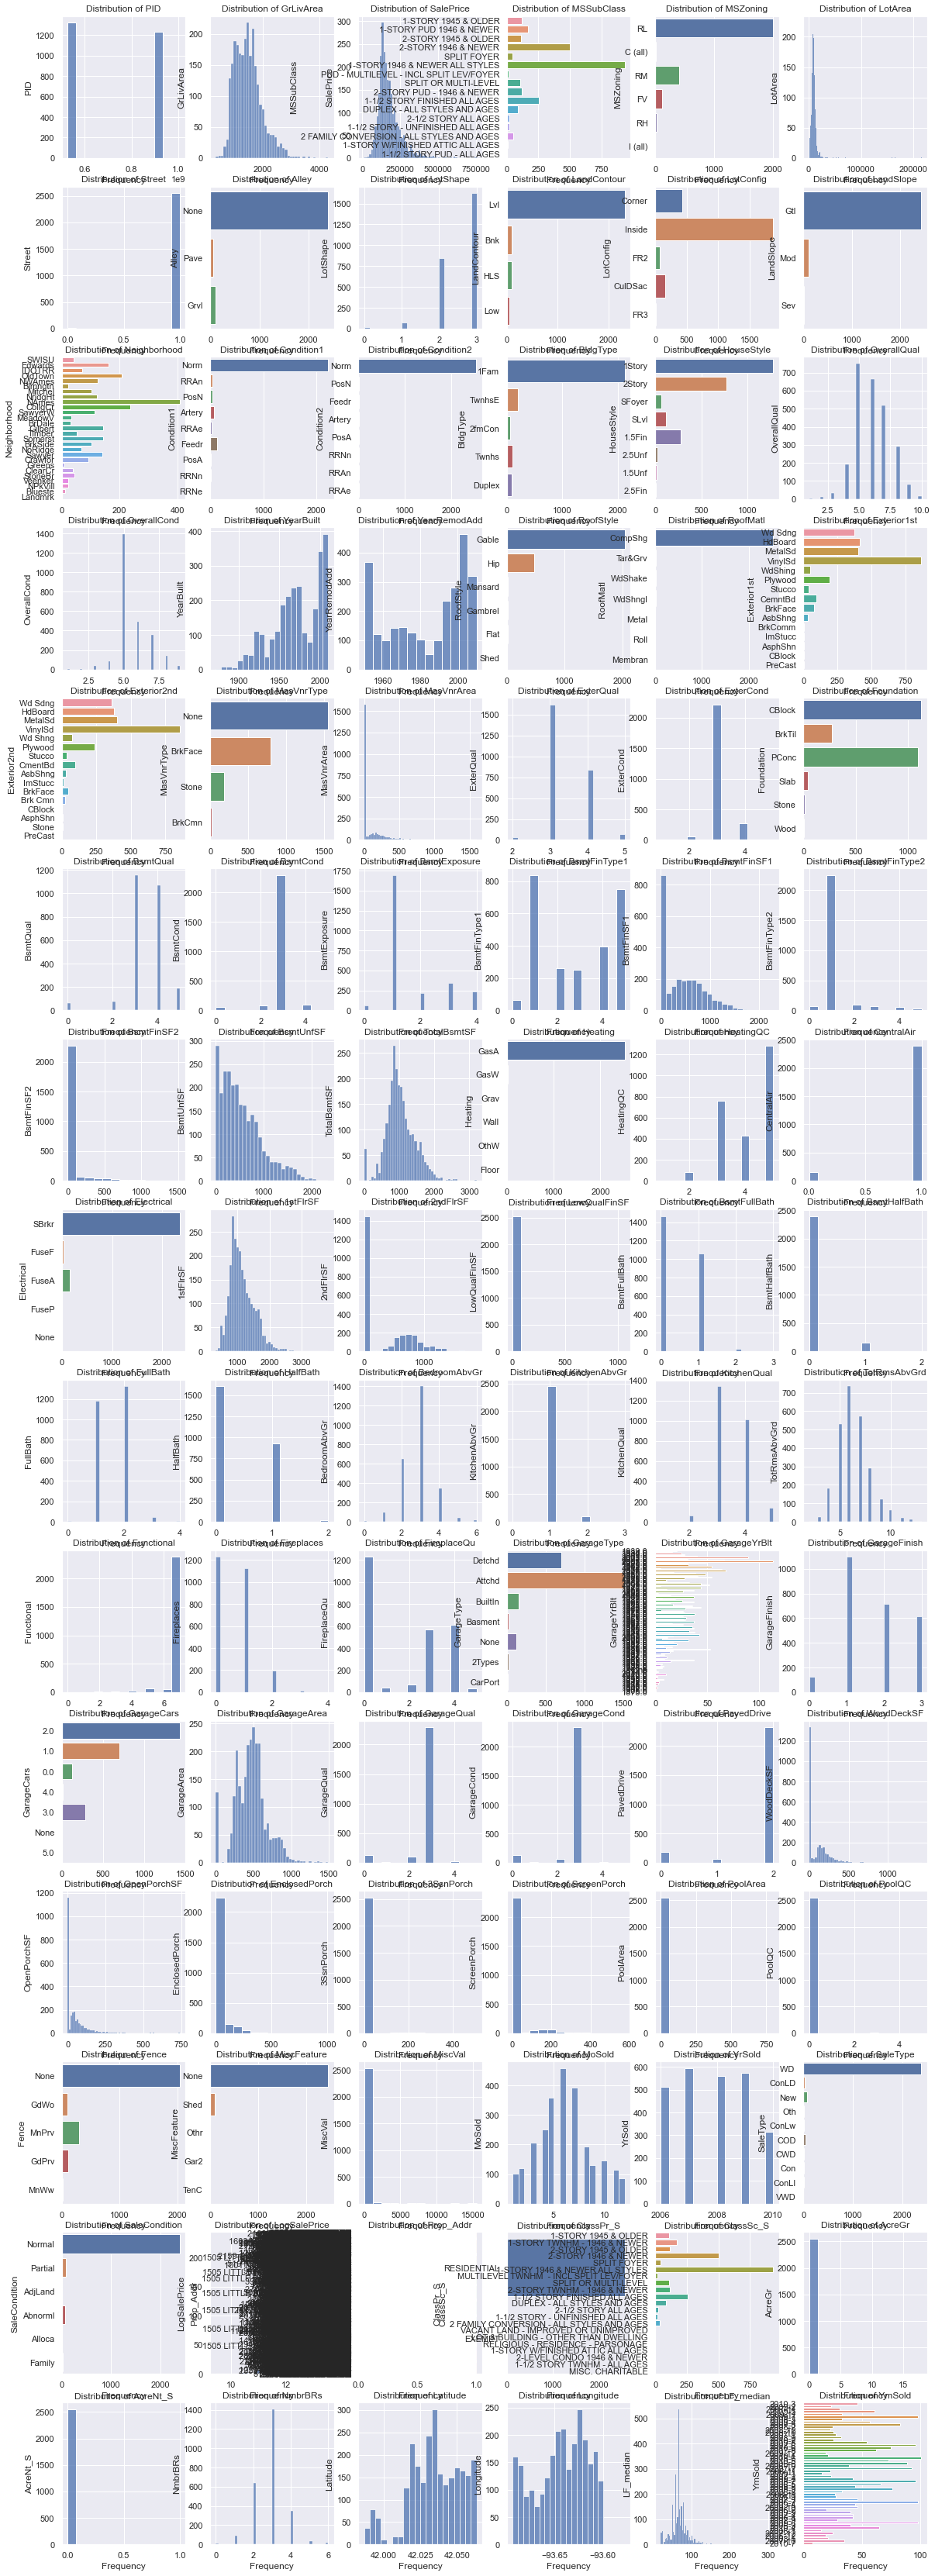

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

df = ames_geo

# Assuming df is your DataFrame
num_cols = len(df.columns)
num_rows = math.ceil(num_cols / 6)  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 6, figsize=(20, 4 * num_rows))  # Adjust the figsize as needed

# If there's only one row, axes will not be an array of arrays
if num_rows == 1:
    axes = [axes]

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(df.columns):
    ax = axes[i]
    ax.set_title(f'Distribution of {col}')
    
    # Check if the column is numeric or categorical
    if pd.api.types.is_numeric_dtype(df[col]):
        sns.histplot(df[col], kde=False, ax=ax)
    else:
        sns.countplot(y=col, data=df, ax=ax)

    ax.set_ylabel(col)
    ax.set_xlabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [135]:
# Cleaning up after moved map section to different notebook

# cols_to_drop = ames_geo.filter(like='Cluster').columns
# ames_geo = ames_geo.drop(cols_to_drop, axis = 1)

ames_geo.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF

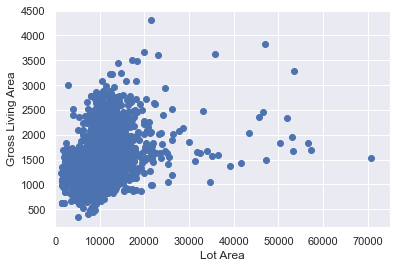

In [141]:
plt.scatter(ames_geo["LotArea"], ames_geo["GrLivArea"])
plt.xlabel("Lot Area")
plt.ylabel("Gross Living Area")
plt.xlim(0,75000)

plt.show()

In [137]:
ames_geo.to_csv('ames_geo_final.csv')

-----------------------------------FEATURE ENGINEERING-----------------------------------------

-----------------------------------

In [91]:
ames_geo.drop(columns=['Color'], inplace=True)

In [ ]:
ames_geo['PriceAreaCat']
# plt.scatter(ames_geo['Cluster'], ames_geo['SalePrice'])